## Isolation Forest for Anomaly Detection
**Objective**: Understand and apply the Isolation Forest algorithm to identify anomalies in datasets.

### Task: Anomaly Detection in Sensor Data
**Steps**:
1. Load Dataset
2. Feature Selection
3. Isolation Forest Implementation
4. Plot Results

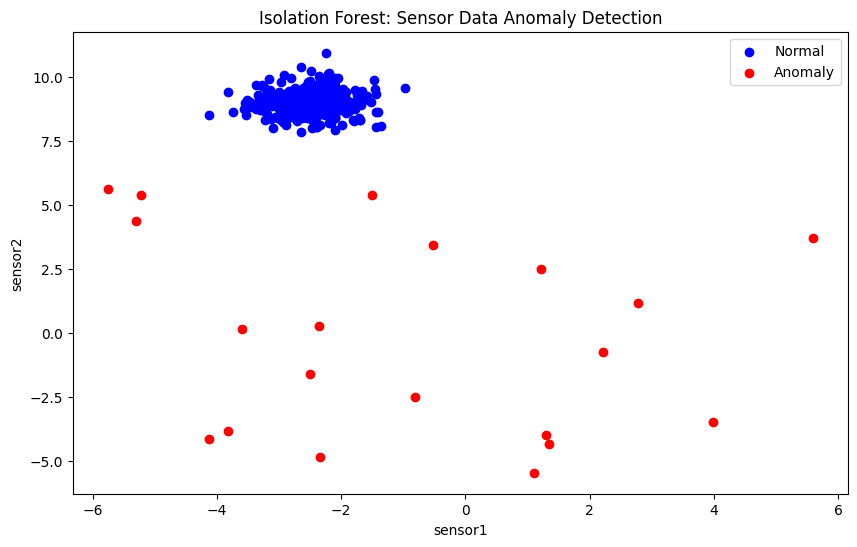

In [1]:
# write your code from here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs

# 1. Load Dataset (simulate sensor data with anomalies)
X, _ = make_blobs(n_samples=300, centers=1, cluster_std=0.5, random_state=42)
# Inject anomalies
rng = np.random.RandomState(42)
anomalies = rng.uniform(low=-6, high=6, size=(20, 2))
X = np.vstack([X, anomalies])
df = pd.DataFrame(X, columns=["sensor1", "sensor2"])

# 2. Feature Selection (all features here)
features = ["sensor1", "sensor2"]

# 3. Isolation Forest Implementation
model = IsolationForest(contamination=0.06, random_state=42)
model.fit(df[features])
df["anomaly"] = model.predict(df[features])
# Convert prediction to boolean: -1 anomaly, 1 normal
df["is_anomaly"] = df["anomaly"] == -1

# 4. Plot Results
plt.figure(figsize=(10, 6))
plt.scatter(df.loc[~df["is_anomaly"], "sensor1"], df.loc[~df["is_anomaly"], "sensor2"], c="blue", label="Normal")
plt.scatter(df.loc[df["is_anomaly"], "sensor1"], df.loc[df["is_anomaly"], "sensor2"], c="red", label="Anomaly")
plt.xlabel("sensor1")
plt.ylabel("sensor2")
plt.title("Isolation Forest: Sensor Data Anomaly Detection")
plt.legend()
plt.show()